In [7]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split

In [8]:
IMG_SIZE = 128  # Image size for model input

# This function reads an image, resizes it, converts it to RGB, and normalizes the pixel values
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return image / 255.0  # Normalize pixel values

# Defining color labels with numeric values
color_labels = {'red': 0, 'blue': 1, 'green': 2, 'yellow': 3, 'black': 4, 'white': 5, 'other': 6}

# Function to load dataset
def load_dataset(data_dir):
    images = []
    labels = []
    
    for color in os.listdir(data_dir):
        if color in color_labels:
            label = color_labels[color]
            color_path = os.path.join(data_dir, color)
            
            for file in os.listdir(color_path):
                img_path = os.path.join(color_path, file)
                img = preprocess_image(img_path)
                images.append(img)
                labels.append(label)
                
    return np.array(images), np.array(labels)

# Load dataset
data_dir = r"C:\Users\gchaw\OneDrive\Desktop\pythonwork\Null Class task 7\test"
X, y = load_dataset(data_dir)
# Checking dataset shape to ensure proper loading
print(f"Dataset loaded: {X.shape[0]} images with labels {y.shape}")

Dataset loaded: 713 images with labels (713,)


In [9]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape[0]} images")
print(f"Testing data: {X_test.shape[0]} images")

Training data: 570 images
Testing data: 143 images


In [10]:
# Creating a CNN model for color classification
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(color_labels), activation='softmax')  # Output layer with 7 classes
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.2985 - loss: 2.7762 - val_accuracy: 0.5874 - val_loss: 0.9570
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.7550 - loss: 0.6952 - val_accuracy: 0.8252 - val_loss: 0.5424
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.8942 - loss: 0.3094 - val_accuracy: 0.9161 - val_loss: 0.3094
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.9683 - loss: 0.1224 - val_accuracy: 0.8881 - val_loss: 0.3335
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.9860 - loss: 0.0448 - val_accuracy: 0.8951 - val_loss: 0.3921
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.9855 - loss: 0.0633 - val_accuracy: 0.8531 - val_loss: 0.4421
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.9859 - loss: 0.0497 - val_accuracy: 0.9161 - val_loss: 0.2981
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.9996 - loss: 0.0066 - val_accuracy: 0.

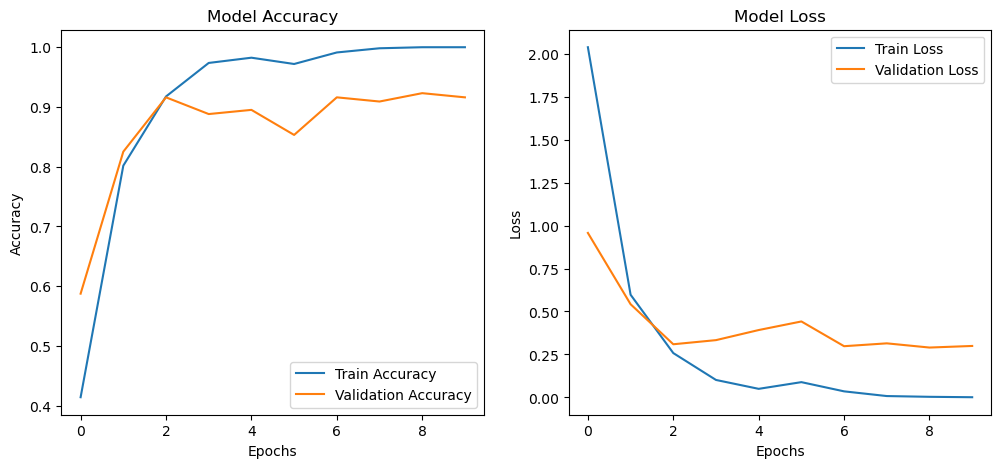

In [12]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [14]:
model.save("car_color_model.keras")
print("✅ Model saved successfully")

✅ Model saved successfully
